In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
import numpy as np

### Limpeza nos dados


In [3]:
data = pd.read_csv('responses.csv')

In [4]:
#Quantidade de nulos por coluna
data.isnull().sum()

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Left - right handed         3
Education                   1
Only child                  2
Village - town              4
House - block of flats      4
Length: 150, dtype: int64

In [5]:
#Deletando os valores nulos
data = data.dropna() 


In [6]:
colunas_categoricas = data.select_dtypes(include = ['object','category']).columns 

#Deletando as colunas categoricas pois elas não podem entrar na comparação
data = data.drop(colunas_categoricas, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 1009
Columns: 139 entries, Music to Number of siblings
dtypes: float64(134), int64(5)
memory usage: 737.2 KB


### Representação em grafo das primeiras 50 colunas do dataset

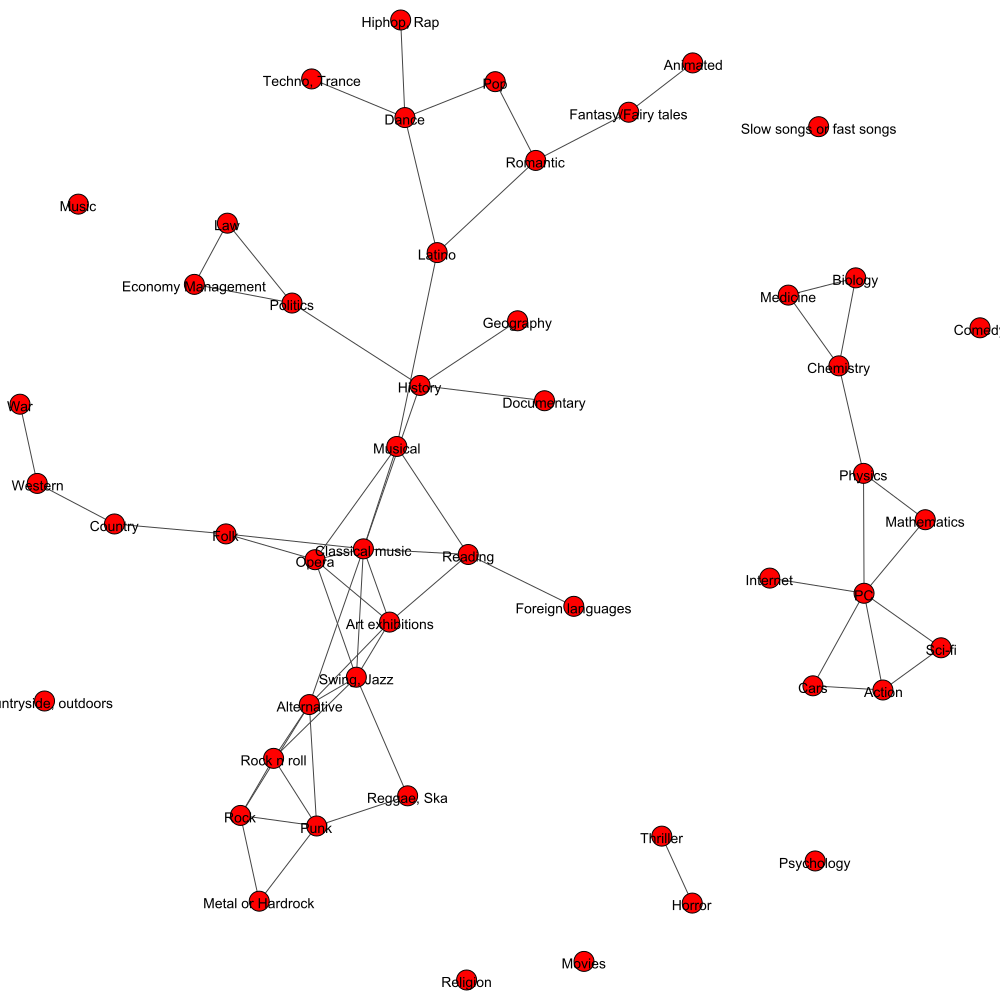

In [7]:
data_subset = data.iloc[:, :50]
correlacao = data_subset.corr()

def ajustar_matriz(matriz):
    matriz[matriz<0.3] = 0    
    return matriz

matriz_correlacao = ajustar_matriz(np.matrix(correlacao))

g = ig.Graph.Weighted_Adjacency(matriz_correlacao.tolist(), mode=ig.ADJ_UNDIRECTED, loops = False)

# Definir todos os pesos das arestas como 1



g.vs['label'] = data[0:50].columns.tolist()




layout = g.layout('fr', dim=2)


# Plotar o grafo com o layout ajustado
ig.plot(g, layout=layout, bbox=(1000,1000), margin=20)

### Representação total do grafo

C:\Users\dialm\AppData\Local\Programs\Python\Python311\Lib\site-packages\igraph\layout.py:691: RuntimeWarning: LGL layout does not support disconnected graphs yet. at src/layout/large_graph.c:179
  layout = func(*args, **kwds)


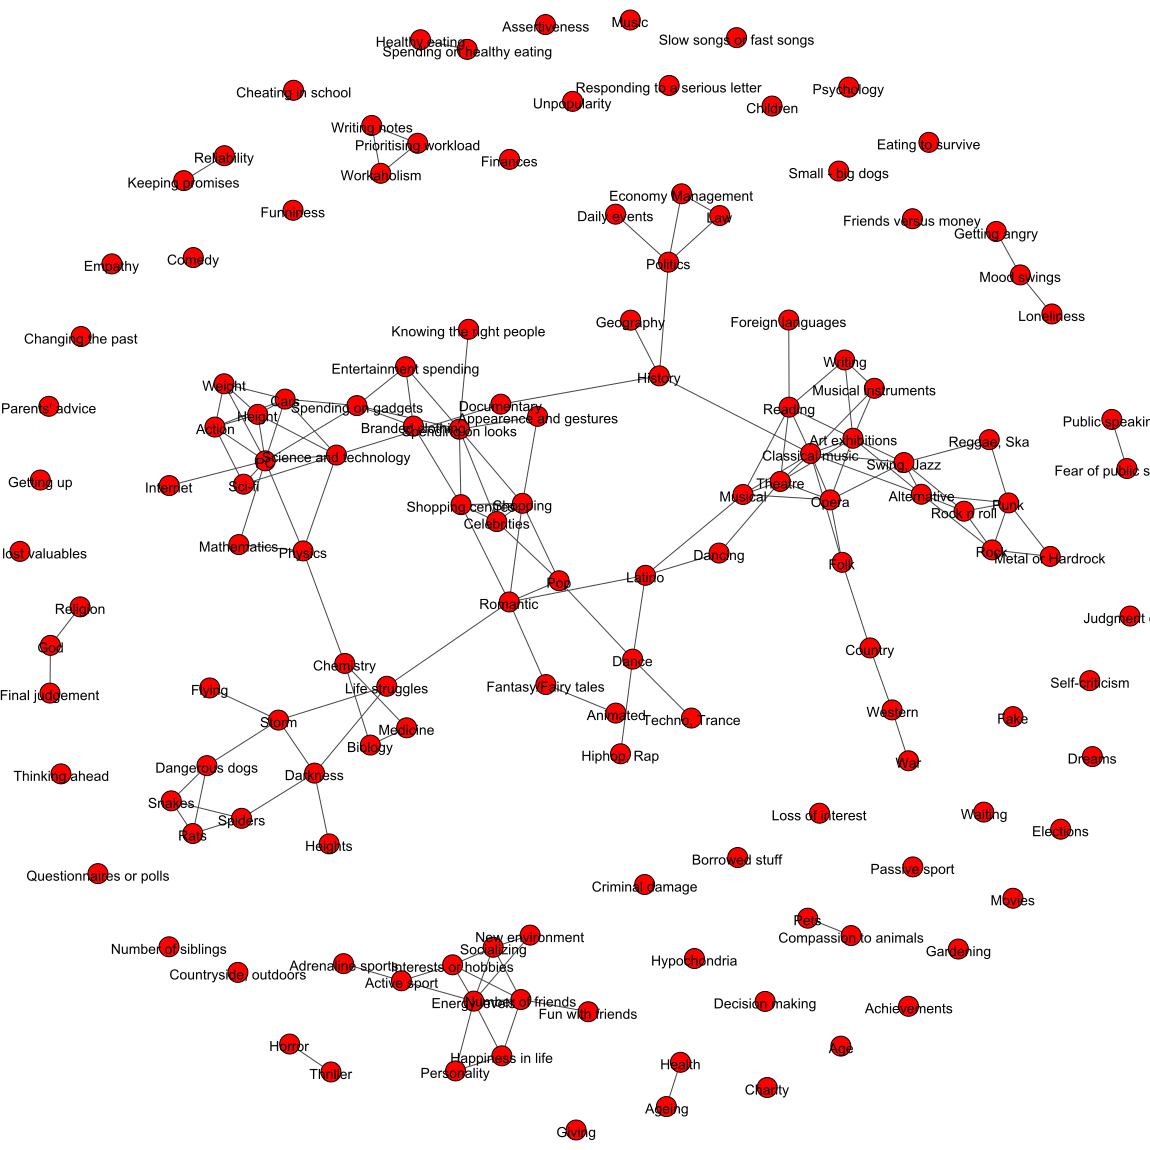

In [8]:
correlacao = data.corr()

def ajustar_matriz(matriz):
    matriz[matriz < 0.3] = 0    
    return matriz

matriz_correlacao = ajustar_matriz(np.matrix(correlacao))

g = ig.Graph.Weighted_Adjacency(matriz_correlacao.tolist(), mode=ig.ADJ_UNDIRECTED, loops=False)

g.vs['label'] = data.columns.tolist()


layout = g.layout('large')


layout = layout.scale(3)


ig.plot(g, layout=layout, bbox=(1150, 1150), margin=20)